In [32]:
!pip install "ucimlrepo"

<ipython-input-31-2e5d46e57d74>:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  parity_results = data.groupby('International').apply(calculate_parity)


   International       PPV       NPV
0              0  0.499536  0.643353
1              1  0.490909  0.571429


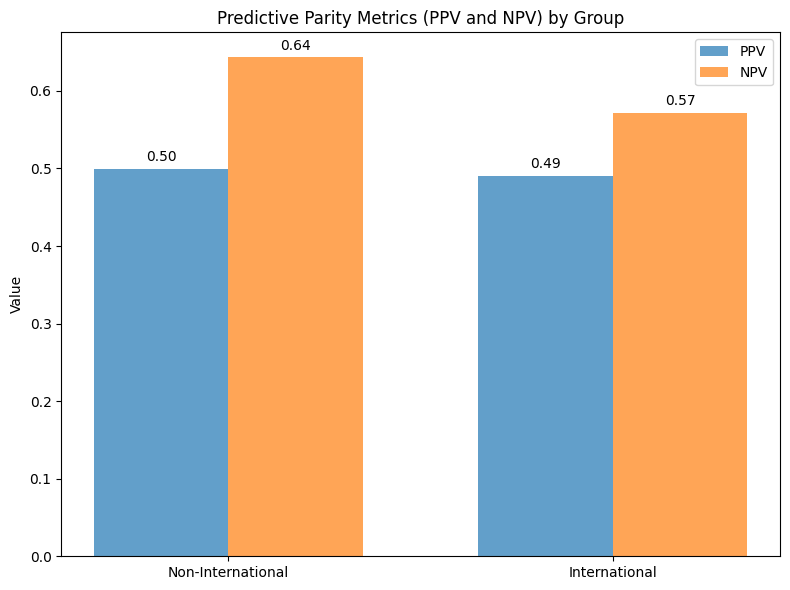

In [31]:

from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
# fetch dataset - https://archive.ics.uci.edu/dataset/697
repo = fetch_ucirepo(id=697)

# Access the features and targets
X = repo.data.features  # Feature data
y = repo.data.targets['Target']  # Target data

# Combine features and target into a single DataFrame for analysis
data = X.copy()
data['Target'] = y

# Define the positive and negative outcomes
positive_outcome = "Graduate"
negative_outcome = "Dropout"

# Function to calculate PPV and NPV
def calculate_parity(group):
    # PPV: Positive Predictive Value
    ppv = group[group['Target'] == positive_outcome].shape[0] / group.shape[0]

    # NPV: Negative Predictive Value
    predicted_negatives = group[group['Target'] != positive_outcome]
    npv = (
        predicted_negatives[predicted_negatives['Target'] == negative_outcome].shape[0]
        / predicted_negatives.shape[0]
        if predicted_negatives.shape[0] > 0 else 0
    )
    return pd.Series({'PPV': ppv, 'NPV': npv})

# Group by "International" and calculate PPV and NPV
parity_results = data.groupby('International').apply(calculate_parity)

# Reset the index for better readability
parity_results.reset_index(inplace=True)

# Display the results
print(parity_results)


# for slide display

# Rename International groups for clarity
parity_results['International'] = parity_results['International'].replace(
    {0: 'Non-International', 1: 'International'}
)

# Plot PPV and NPV for each group
fig, ax = plt.subplots(figsize=(8, 6))

# Bar width
bar_width = 0.35

# X-axis positions for the groups
x = range(len(parity_results))

# Plot PPV and NPV as side-by-side bars
ax.bar(x, parity_results['PPV'], width=bar_width, label='PPV', alpha=0.7)
ax.bar([p + bar_width for p in x], parity_results['NPV'], width=bar_width, label='NPV', alpha=0.7)

# Add labels, title, and legend
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(parity_results['International'])
ax.set_ylabel('Value')
ax.set_title('Predictive Parity Metrics (PPV and NPV) by Demographic Group')
ax.legend()

# Add value labels on the bars
for i, (ppv, npv) in enumerate(zip(parity_results['PPV'], parity_results['NPV'])):
    ax.text(i, ppv + 0.01, f'{ppv:.2f}', ha='center')
    ax.text(i + bar_width, npv + 0.01, f'{npv:.2f}', ha='center')

# Show the plot
plt.tight_layout()
plt.show()
